<a href="https://colab.research.google.com/github/mattany/IML/blob/main/problem_set_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [24]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)

2.b. It's interesting how similar the ouptut of the perceptron on the first and second training sets is.

Draw the axes:

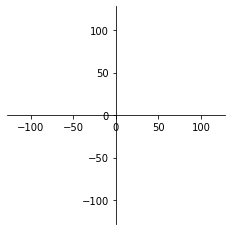

In [25]:
pos_dist_size = 2**7
def plot_axes():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.xlim(-pos_dist_size, pos_dist_size)
    plt.ylim(-pos_dist_size, pos_dist_size)
    plt.gca().set_aspect('equal', adjustable='box')

    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
plot_axes()

Draw a random line:

In [26]:
def random_hyperplane(d):
    plane = pos_dist_size * 2 * np.random.random_sample(size=(d, d)) - pos_dist_size
    ones = np.empty(d)
    ones.fill(1)
    w = np.linalg.solve(plane, ones)
    w = np.append(-1, w) # Homogenize
    return w

# m, n = random_line()

    
w_star = random_hyperplane(2)

Generate the inputs:

In [27]:
def gen_inputs(n, d):
    inputs = pos_dist_size * 2 * np.random.random_sample(size=(n, d)) - pos_dist_size
    inputs = np.c_[np.ones(inputs.shape[0]), inputs] # Homogenize
    return inputs

inputs = gen_inputs(20, 2)

Evaluate the inputs and plot the outputs:

In [28]:
def evaluate_point(w, x):
    return 1 if np.dot(w, x) > 0 else -1

def evaluate_points(inputs, w):
    return [evaluate_point(w, input) for input in inputs]
 

def get_plot_coords(w):

    Xs = [-pos_dist_size, pos_dist_size, 0]
    Ys = [
        (-w[0] - w[1] * Xs[0]) / w[2],
        (-w[0] - w[1] * Xs[1]) / w[2],
        (-w[0] - w[1] * Xs[2]) / w[2]
    ]
    return Xs, Ys

outputs = evaluate_points(inputs, w_star)




def plot_outputs(w, w_star, inputs, outputs):
    plot_axes()
    red_Xs = [ inputs[i][1] for i in range(len(inputs)) if outputs[i] == 1]
    red_Ys = [ inputs[i][2] for i in range(len(inputs)) if outputs[i] == 1]
    blue_Xs = [ inputs[i][1] for i in range(len(inputs)) if outputs[i] == -1 ]
    blue_Ys = [ inputs[i][2] for i in range(len(inputs)) if outputs[i] == -1 ]
    plt.scatter(red_Xs, red_Ys, color="magenta")
    plt.scatter(blue_Xs, blue_Ys, color="turquoise")
    plt.plot(*get_plot_coords(w),  label="f - target function", color="red")
    plt.plot(*get_plot_coords(w_star), label="g - final hypothesis", color="green")
    plt.legend()

a. Converged in 3483 updates
c. f and g are visibly different


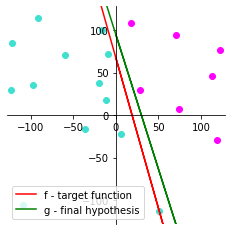

In [29]:
def get_misclassified(w, inputs, outputs):
    for i, inp in enumerate(inputs):
        if outputs[i] != evaluate_point(w, inp):
            return i
    return -1


def perceptron(inputs, outputs):
    shape = np.shape(inputs[0])
    w = np.zeros(shape)
    misclassified = get_misclassified(w, inputs, outputs)
    steps = 0
    done = False
    while not done:
        done = True
        for i, inp in enumerate(inputs):
            if outputs[i] != evaluate_point(w, inp):
                done = False
                w += outputs[i] * inp   
                steps +=1
    print(f"a. Converged in {steps} updates")
    return w

w = perceptron(inputs, outputs)
plot_outputs(w, w_star, inputs, outputs)
print(f"c. f and g are visibly different")

2.a.a-c can be seen above. Now we generate test data and calculate the error.

Generate some test data:

In [30]:
test_inputs = gen_inputs(100, 2)


2.a.d.

In [31]:

def calculate_error(test_inputs, w, w_star):
    n = len(test_inputs)
    test_outputs = evaluate_points(test_inputs, w_star)
    actual_outputs = evaluate_points(test_inputs, w)
    return sum([abs(test_outputs[i] - actual_outputs[i]) for i in range(n)]) / 200

print(f"d. f and g disagree on {calculate_error(test_inputs, w, w_star)} of the points")

d. f and g disagree on 0.09 of the points


2.b. It's interesting how similar the ouptut of the perceptron on the first and second training sets is.

In [32]:
b_inputs = gen_inputs(20, 2)
b_outputs = evaluate_points(b_inputs, w_star)

a. Converged in 2638 updates
c. f and g are visibly different
d. f and g disagree on 0.11 of the points


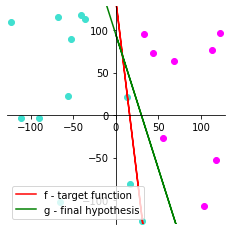

In [33]:

b_w = perceptron(b_inputs, b_outputs)
plot_outputs(b_w, w_star, b_inputs, b_outputs)
print(f"c. f and g are visibly different")
print(f"d. f and g disagree on {calculate_error(test_inputs, b_w, w_star)} of the points")

2.c. The time to converge grew a lot, and the result is more accurate.

In [34]:
c_inputs = gen_inputs(100, 2)
c_outputs = evaluate_points(c_inputs, w_star)

a. Converged in 4067 updates
c. f and g are much closer than before.
d. f and g disagree on 0.02 of the points


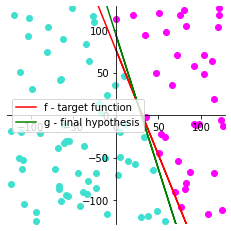

In [35]:

c_w = perceptron(c_inputs, c_outputs)
plot_outputs(c_w, w_star, c_inputs, c_outputs)
print(f"c. f and g are much closer than before.")
print(f"d. f and g disagree on {calculate_error(test_inputs, c_w, w_star)} of the points")

2.d. The time to converge grew marginally more, and now the lines are nearly indistinguishable.



In [36]:
d_inputs = gen_inputs(100, 2)
d_outputs = evaluate_points(d_inputs, w_star)

a. Converged in 3319 updates
c. f and g are almost the same.
d. f and g disagree on 0.01 of the points


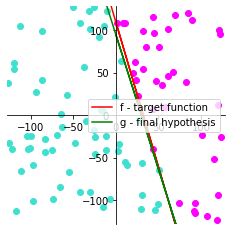

In [37]:
d_w = perceptron(d_inputs, d_outputs)
plot_outputs(d_w, w_star, d_inputs, d_outputs)
print(f"c. f and g are almost the same.")
print(f"d. f and g disagree on {calculate_error(test_inputs, d_w, w_star)} of the points")

2.e. Randomized perceptron

In [89]:
e_w_star = random_hyperplane(10)
e_inputs = gen_inputs(400, 10)

In [ ]:
def get_all_misclassified(w, inputs, outputs):
    misclassified = np.zeros(len(inputs))
    for i, inp in enumerate(inputs):
        if outputs[i] != evaluate_point(w, inp):
            misclassified[i] = 1
    return misclassified

def perceptron_random(inputs, outputs):
    n = len(inputs)
    shape = np.shape(inputs[0])
    w = np.zeros(shape)
    misclassified = get_all_misclassified(w, inputs, outputs)
    steps = 0
    while np.any(misclassified):
        index = np.random.randint(n)
        while not misclassified[index]:
            index = (index + 1) % n
        
        w += outputs[index] * inputs[index]
        misclassified =get_all_misclassified(w, inputs, outputs)
        steps +=1
        if steps % 10000 == 0:
            print(steps)
    print(f"a. Converged in {steps} updates")
    return w

e_outputs = evaluate_points(e_inputs, e_w_star)
perceptron_random(e_inputs, e_outputs)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
